Joao Quinta

## TP 7

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import pandas as pd

df = pd.read_csv('closing_prices.csv')

In [21]:
daily_returns = df.pct_change().fillna(0)
daily_returns = daily_returns.to_numpy()

### 1

In [22]:
def monte_carlo_portfolio(dret, nIter):
    # Initialize lists to store expected returns and risks
    means, stds = [], []
    # Generate nIter sets of random weights for the assets
    weights = np.random.random((nIter, 7))
    weights /= weights.sum(axis=1, keepdims=True)
    # Calculate the expected returns and risks for each set of weights
    for weight in weights:
        portfolio_returns = np.sum(dret * weight, axis=1)
        means.append(np.mean(portfolio_returns))
        stds.append(np.std(portfolio_returns))
    return means, stds

In [23]:
nPortfolio = 100000
means, stds = monte_carlo_portfolio(daily_returns, nPortfolio)

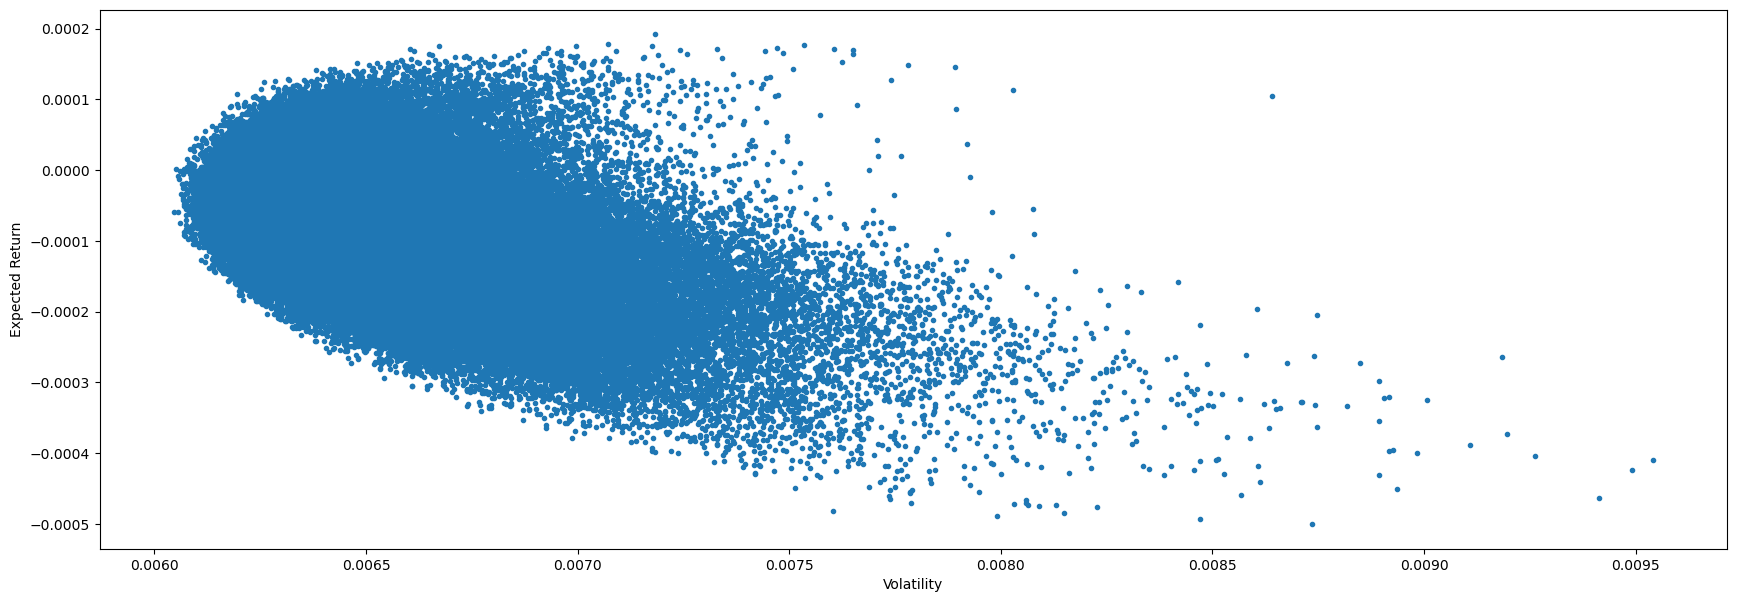

In [24]:
# plot mean to stds
plt.figure(figsize=(21,7))
plt.plot(stds, means, ".")
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.show()

### 2

In [25]:
def markowitz_weights(dret, mu_p):
    # Calculate the covariance matrix and its inverse
    cov = np.cov((dret - np.mean(dret, axis=0)).T)
    cov_inv = np.linalg.inv(cov)
    # Calculate the mean returns of the assets
    mu = np.mean(dret, axis=0)
    # Calculate the parameters a, b, c, and d
    ones_vec = np.ones(7)
    a = ones_vec @ cov_inv @ ones_vec
    b = ones_vec @ cov_inv @ mu
    c = mu.T @ cov_inv @ mu
    d = a * c - b * b
    # Calculate the Lagrange multipliers lambda_1 and lambda_2
    lambda_1 = (c - b * mu_p) / d
    lambda_2 = (a * mu_p - b) / d
    # Calculate the optimal weights
    w = cov_inv @ (lambda_1 * ones_vec + lambda_2 * mu)
    return w

In [26]:
all_weights = [markowitz_weights(daily_returns, mu_pi) for mu_pi in np.linspace(-0.0006, 0.0004, 100)]
means_mark  = [np.mean(np.sum(daily_returns * weight, axis=1)) for weight in all_weights]
stds_mark = [np.std(np.sum(daily_returns * weight, axis=1)) for weight in all_weights]

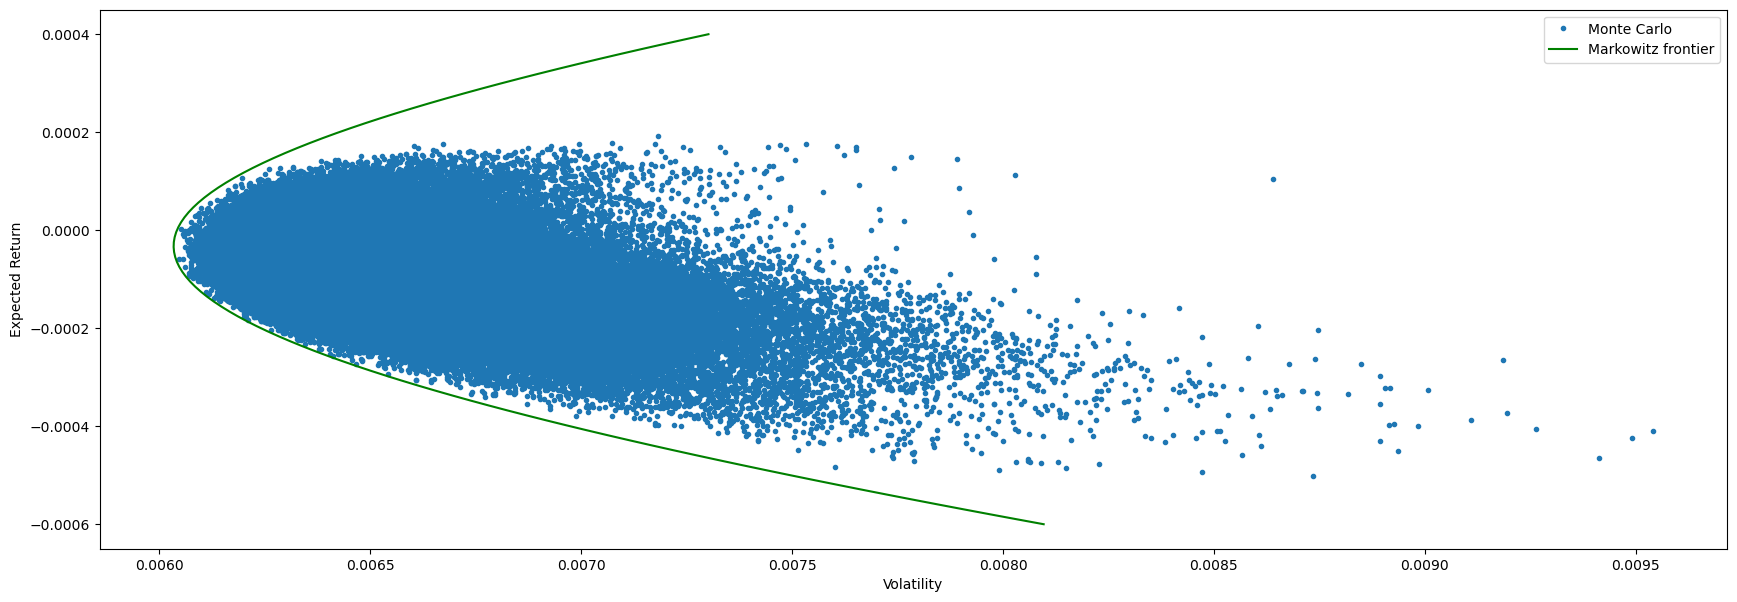

In [30]:
# plot mean to stds
plt.figure(figsize=(21,7))
plt.plot(stds, means, ".", label="Monte Carlo")
plt.plot(stds_mark, means_mark, "g", label="Markowitz frontier") 
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.legend()
plt.show()

### 3

In [31]:
opt_std = np.min(stds_mark)
opt_expt = means_mark[np.argmin(stds_mark)]

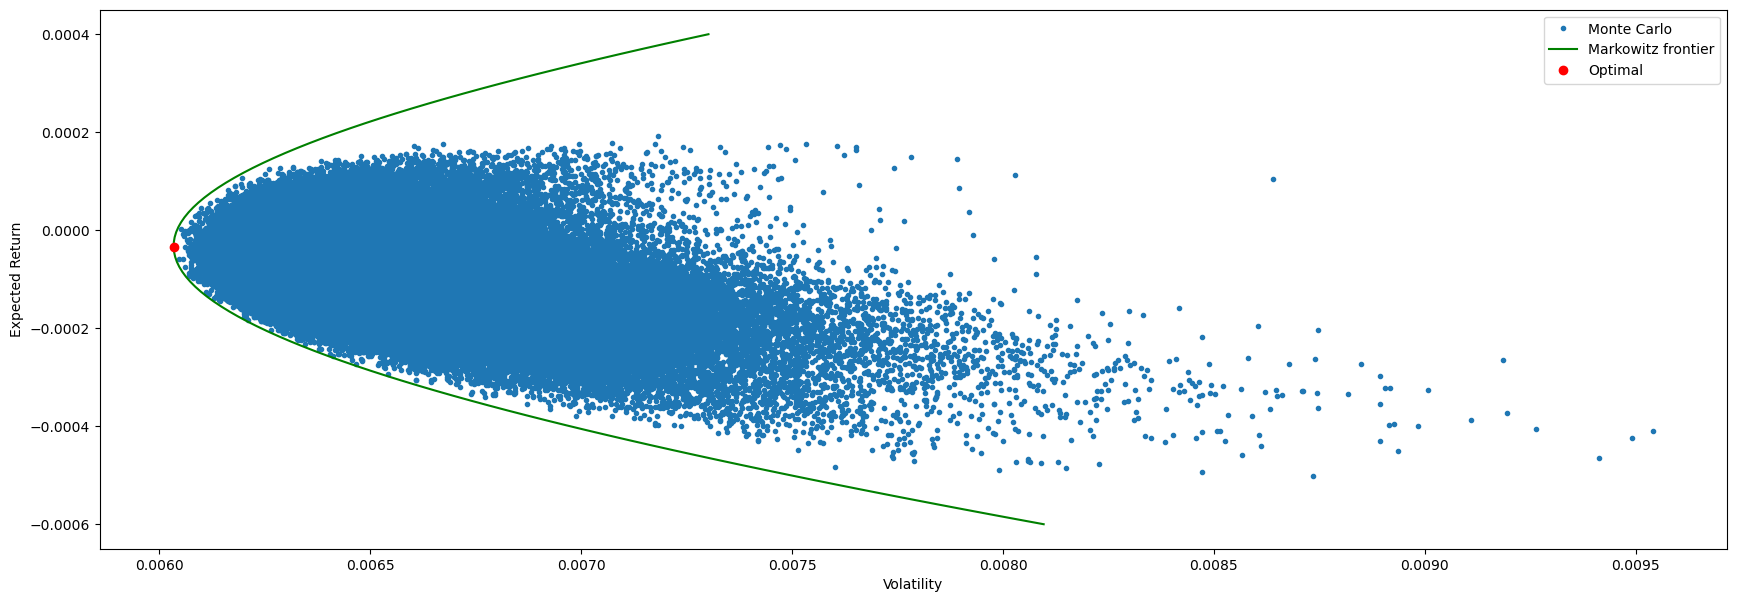

Volatility:  0.006033736305880346 Expected Return:  -3.4343434343434184e-05


In [32]:
# plot mean to stds
plt.figure(figsize=(21,7))
plt.plot(stds, means, ".", label="Monte Carlo")
plt.plot(stds_mark, means_mark, "g", label="Markowitz frontier") 
plt.plot(opt_std, opt_expt, "ro", label="Optimal")
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.legend()
plt.show()

print("Volatility: ", opt_std, "Expected Return: ", opt_expt)